# task3 - To Explore Unsupervised Machine Learning  

In [17]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

In [18]:
iris = pd.read_csv(r"C:\Users\rugve\Downloads\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# checking value count for "species" column

In [19]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# checking for null 

In [20]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Kmeans

In [29]:
df_iris = pd.DataFrame(iris)

In [30]:

x = df_iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting line graph 

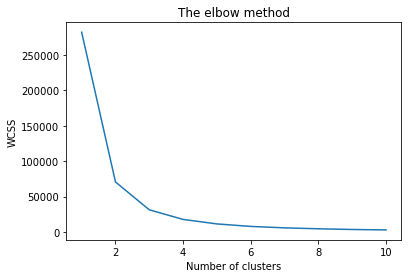

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Value of k is 3

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0 )
y_means = kmeans.fit_predict(x)

# Visualizing the clusters 

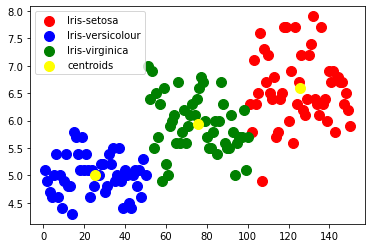

In [34]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],
           s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'centroids')

plt.legend()